In [ ]:
#While NetCDF files can be viewed by NASA software Panoply, we felt the view could be improved. Investgations here on data visualization of NetCDF files using Geopandas & Plotly. Ultimate result is that Panoply still has a superior output, although there is much potential in this work

In [ ]:
#installing libraries for direct netcdf4 manipulation.
pip install netCDF4

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 27.5 MB/s eta 0:00:00


In [ ]:
#@title Mount Google Drive

from google.colab import drive

# The following command will prompt a URL for you to click and obtain the
# authorization code

drive.mount("/content/drive")

# Set up data folder
from pathlib import Path

DATA = Path("/content/drive/My Drive/HWDataECBME")
filename=DATA / "HAQ_TROPOMI_NO2_GLOBAL_QA75_L3_Annual_2023_V2.4_20240719.nc4"


Mounted at /content/drive


In [ ]:
# create NetCDF variable and

import netCDF4 as nc
nc_fid = nc.Dataset(filename ,mode='r',format='NETCDF4')

In [ ]:
#split variables from NetCDF File into individual variables
lat = nc_fid.variables['Latitude'][:]
lon = nc_fid.variables['Longitude'][:]
no2 = nc_fid.variables['Tropospheric_NO2'][:]

In [ ]:
#Investigations of different shape files to be used with Geopandas. In order to plot the worldmap, a shapefile must be used as the base.

!pip install geodatasets
import geodatasets

# Get a list of all dataset keys
dataset_keys = list(geodatasets.data.flatten().keys())

# Print the number of available datasets
print(f"Total available datasets: {len(dataset_keys)}")

Total available datasets: 58


In [ ]:
#examine shapefiles available in Geopandas package

print("Some available datasets:")
for key in dataset_keys[:58]:   #Adjust the slice to show more or fewer examples
    print(f"  - {key}")

Some available datasets:
  - geoda.airbnb
  - geoda.atlanta
  - geoda.cars
  - geoda.charleston1
  - geoda.charleston2
  - geoda.chicago_health
  - geoda.chicago_commpop
  - geoda.chile_labor
  - geoda.cincinnati
  - geoda.cleveland
  - geoda.grid100
  - geoda.groceries
  - geoda.guerry
  - geoda.health
  - geoda.health_indicators
  - geoda.hickory1
  - geoda.hickory2
  - geoda.home_sales
  - geoda.houston
  - geoda.juvenile
  - geoda.lansing1
  - geoda.lansing2
  - geoda.lasrosas
  - geoda.liquor_stores
  - geoda.malaria
  - geoda.milwaukee1
  - geoda.milwaukee2
  - geoda.ncovr
  - geoda.natregimes
  - geoda.ndvi
  - geoda.nepal
  - geoda.nyc
  - geoda.nyc_earnings
  - geoda.nyc_education
  - geoda.nyc_neighborhoods
  - geoda.orlando1
  - geoda.orlando2
  - geoda.oz9799
  - geoda.phoenix_acs
  - geoda.police
  - geoda.sacramento1
  - geoda.sacramento2
  - geoda.savannah1
  - geoda.savannah2
  - geoda.seattle1
  - geoda.seattle2
  - geoda.sids
  - geoda.sids2
  - geoda.south
  - geoda.

KeyboardInterrupt: 

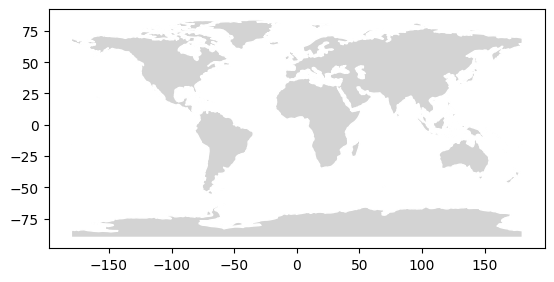

In [ ]:
# This code block will take some time. Uses Geopandas package to plot worldmap of NASA data nc4

import geodatasets

# Get a list of all dataset keys
# dataset_keys = list(geodatasets.data.flatten().keys())

# Print the number of available datasets
# print(f"Total available datasets: {len(dataset_keys)}")

# print("Some available datasets:")
# for key in dataset_keys[:58]:   #Adjust the slice to show more or fewer examples
#    print(f"  - {key}")

!pip install geodatasets
import geopandas as gpd
import geodatasets
import matplotlib.pyplot as plt
import numpy as np # Import numpy for reshaping

# Use geodatasets to get the path for 'naturalearth_lowres'
world = gpd.read_file(geodatasets.get_path('naturalearth.land'))

# Reshape latitude and longitude to have the same dimensions as no2
latitude = nc_fid.variables['Latitude'][:]
longitude = nc_fid.variables['Longitude'][:]

# Assuming no2 has shape (1350, 3590)
latitude = latitude.reshape(-1, 1)  # Reshape to (1350, 1) or (3590, 1) depending on your data
latitude = np.repeat(latitude, longitude.shape[0], axis=1) # Repeat to match longitude shape

longitude = longitude.reshape(1, -1)  # Reshape to (1, 3590) or (1, 1350) depending on your data
longitude = np.repeat(longitude, latitude.shape[0], axis=0)  #Repeat to match latitude shape

# Create a GeoDataFrame from your data
data = {'latitude': latitude.flatten(), 'longitude': longitude.flatten(), 'variable': no2.flatten()} # Flatten all arrays
gdf = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data['longitude'], data['latitude']))

# Plot the world map
ax = world.plot(color='lightgray', edgecolor='white')

# Plot the data points with variable as color
gdf.plot(ax=ax, column='variable', cmap='viridis', markersize=50, legend=True)

plt.show()

In [ ]:
# Resources consulted to construct code

# http://unidata.github.io/netcdf4-python/
# https://acdisc.gesdisc.eosdis.nasa.gov/data/HAQAST/HAQ_TROPOMI_NO2_GLOBAL_A_L3.2.4/doc/README_TROPOMI_Level3_GLOBAL_TropNO2_DG_05282024.pdf
# https://data.gesdisc.earthdata.nasa.gov/data/HAQAST/HAQ_TROPOMI_NO2_GLOBAL_A_L3.2.4/HAQ_TROPOMI_NO2_GLOBAL_QA75_L3_Annual_2023_V2.4_20240719.nc4
# https://stackoverflow.com/questions/65377866/working-with-netcdf-on-python-with-matplotlib